In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline


%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
player = pd.read_csv('~/Desktop/all/Hero stat.csv')
heroes = pd.read_csv('~/desktop/Project-2AB-master/overwatch_MASTER.csv')

In [3]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 36 columns):
Hero            27 non-null object
Class           27 non-null object
#F?             27 non-null int64
Win%?           27 non-null object
UU?             27 non-null object
UU-Win%?        27 non-null object
NU?             27 non-null object
NU-Win%?        27 non-null object
THU-Win%?       27 non-null object
FD?             27 non-null object
FD-Win%?        27 non-null object
Unnamed: 11     0 non-null float64
FSUTHU?         26 non-null float64
FSUTHU-Win%?    27 non-null object
FMUTHU?         27 non-null int64
FMUTHU-Win%?    27 non-null object
FLUTHU?         27 non-null int64
FLUTHU-Win%?    27 non-null object
FMU?            27 non-null object
FMU-Win%?       27 non-null object
FMUUU?          27 non-null int64
FMUUU-Win%?     27 non-null object
FMUNU?          27 non-null int64
FMUNU-Win%?     27 non-null object
FSU?            27 non-null object
FSU-Win%?       27 non-nul

In [4]:
player.rename(columns={'#F?':'usage'}, inplace=True)#.plot(kind='bar');
player.rename(columns={'Win%?':'win_perc'}, inplace=True)
player.rename(columns={'UU?':'UU', 'UU-Win%?':'UU_win', 'NU?':'NU','NU-Win%?':'NU_win', 'THU-Win%?':'THU_win'}, inplace=True)
player_clean = player.set_index('Hero', drop=True)
player_clean.head()


,Class,usage,win_perc,UU,UU_win,NU,NU_win,THU_win,FD?,FD-Win%?,...,FSUUU?,FSUUU-Win%?,FSUNU?,FSUNU-Win%?,FLU?,FLU-Win%?,FLUUU?,FLUUU-Win%?,FLUNU?,FLUNU-Win%?
Hero,,,,,,,,,,,,,,,,,,,,,
All Heroes,Nan%,207600,46.97%,20.95%,53.54%,79.05%,45.23%,57.02%,0.08 (17283),16.53%,...,11215,46.68%,82709,46.93%,27.38%,27.71%,9657,30.81%,47181,27.08%
Ana,S,1646,50.30%,30.13%,51.61%,69.87%,49.74%,51.68%,0.08 (139),20.14%,...,149,41.61%,607,54.04%,24.73%,28.75%,91,32.97%,316,27.53%
Bastion,D,423,46.57%,16.55%,58.57%,83.45%,44.19%,58.57%,0.12 (51),25.49%,...,15,73.33%,212,43.87%,21.51%,28.57%,10,40.00%,81,27.16%
Brigitte,S,2765,47.52%,20.14%,62.66%,79.86%,43.70%,66.51%,0.14 (380),13.42%,...,147,56.46%,1092,48.63%,29.55%,27.78%,117,47.86%,700,24.43%
D.Va,T,31306,46.83%,0.00%,NaN%,100.00%,46.83%,NaN%,0.03 (1035),16.04%,...,0,NaN%,14088,46.77%,27.74%,28.16%,0,NaN%,8685,28.16%


In [5]:
player_clean = player_clean.drop(['All Heroes'])

In [6]:
player_clean.mean()

usage          7984.615385
Unnamed: 11            NaN
FSUTHU?         265.880000
FMUTHU?         669.230769
FLUTHU?         170.269231
FMUUU?          870.269231
FMUNU?         1315.807692
FSUUU?          431.346154
FSUNU?         3181.115385
FLUUU?          371.423077
FLUNU?         1814.653846
dtype: float64

In [7]:
player_clean['win_perc'] = player_clean['win_perc'].astype(str).str.rstrip('%').astype(float)
player_clean['UU'] = player_clean['UU'].astype(str).str.rstrip('%').astype(float)
player_clean['UU_win'] = player_clean['UU_win'].astype(str).str.rstrip('%').astype(float)
player_clean['NU'] = player_clean['NU'].astype(str).str.rstrip('%').astype(float)
player_clean['NU_win'] = player_clean['NU_win'].astype(str).str.rstrip('%').astype(float)
#player_clean['FD?'] = player['Fights'].astype(float)
player_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries,  Ana to  Zenyatta
Data columns (total 35 columns):
Class           26 non-null object
usage           26 non-null int64
win_perc        26 non-null float64
UU              26 non-null float64
UU_win          25 non-null float64
NU              26 non-null float64
NU_win          26 non-null float64
THU_win         26 non-null object
FD?             26 non-null object
FD-Win%?        26 non-null object
Unnamed: 11     0 non-null float64
FSUTHU?         25 non-null float64
FSUTHU-Win%?    26 non-null object
FMUTHU?         26 non-null int64
FMUTHU-Win%?    26 non-null object
FLUTHU?         26 non-null int64
FLUTHU-Win%?    26 non-null object
FMU?            26 non-null object
FMU-Win%?       26 non-null object
FMUUU?          26 non-null int64
FMUUU-Win%?     26 non-null object
FMUNU?          26 non-null int64
FMUNU-Win%?     26 non-null object
FSU?            26 non-null object
FSU-Win%?       26 non-null object
FSUUU?          

In [ ]:
player_clean2 = player_clean.UU_win.fillna(player_clean.UU_win.mean())

In [8]:
player_clean.sort_values('usage', ascending=False, inplace=True)
player_clean.head()

,Class,usage,win_perc,UU,UU_win,NU,NU_win,THU_win,FD?,FD-Win%?,...,FSUUU?,FSUUU-Win%?,FSUNU?,FSUNU-Win%?,FLU?,FLU-Win%?,FLUUU?,FLUUU-Win%?,FLUNU?,FLUNU-Win%?
Hero,,,,,,,,,,,,,,,,,,,,,
D.Va,T,31306,46.83,0.00,NaN,100.00,46.83,NaN%,0.03 (1035),16.04%,...,0,NaN%,14088,46.77%,27.74%,28.16%,0,NaN%,8685,28.16%
Zenyatta,S,28798,47.62,23.61,49.87,76.39,46.93,52.78%,0.10 (2776),16.35%,...,1812,44.70%,11117,48.21%,27.60%,28.66%,1920,30.47%,6028,28.09%
Mercy,S,27248,47.53,24.93,51.47,75.07,46.22,56.62%,0.05 (1337),13.31%,...,1820,46.37%,10668,47.88%,26.84%,28.33%,1677,29.76%,5636,27.91%
Winston,T,25237,45.74,22.68,53.35,77.32,43.50,58.30%,0.10 (2537),17.54%,...,1530,49.02%,9626,44.13%,28.24%,28.21%,1319,31.84%,5807,27.38%
Tracer,D,20370,45.10,31.19,51.22,68.81,42.32,53.97%,0.09 (1839),14.03%,...,1610,41.37%,7302,44.40%,28.35%,28.02%,1266,29.94%,4508,27.48%


In [9]:
player_clean['pred'] = player_clean.win_perc.mean()

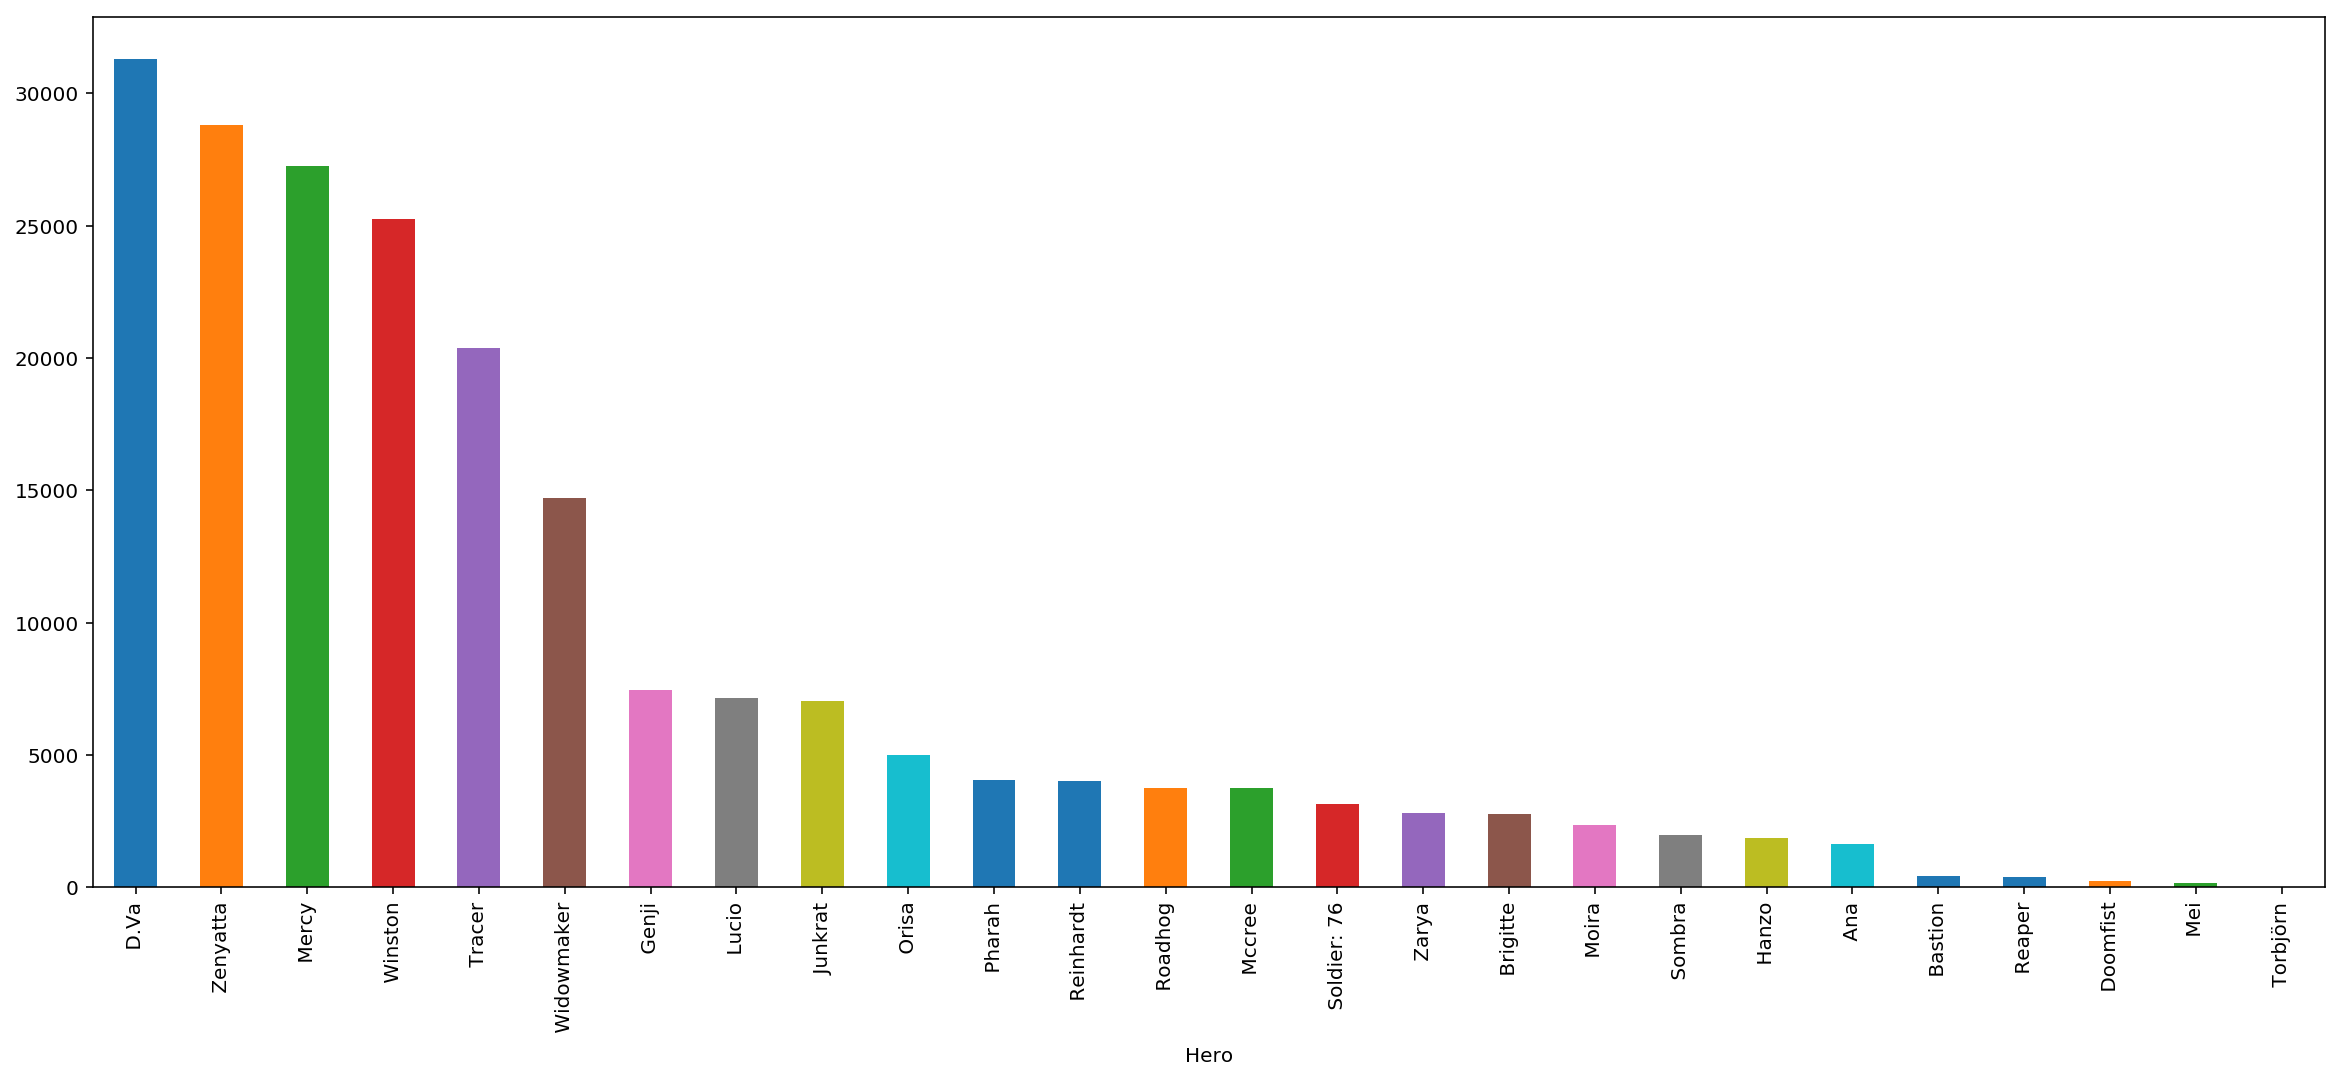

In [10]:
player_clean.usage.plot(kind='bar', figsize=(20, 8));

In [11]:
player_clean.sort_values('win_perc', ascending=False, inplace=True)
player_clean.head()

,Class,usage,win_perc,UU,UU_win,NU,NU_win,THU_win,FD?,FD-Win%?,...,FSUUU-Win%?,FSUNU?,FSUNU-Win%?,FLU?,FLU-Win%?,FLUUU?,FLUUU-Win%?,FLUNU?,FLUNU-Win%?,pred
Hero,,,,,,,,,,,,,,,,,,,,,
Orisa,T,5011,54.50,15.03,57.64,84.97,53.95,60.06%,0.08 (396),20.71%,...,51.46%,2414,57.42%,22.01%,30.28%,153,33.33%,950,29.79%,45.874231
Junkrat,D,7022,54.44,27.81,60.73,72.19,52.02,62.21%,0.11 (776),22.94%,...,53.32%,2906,58.47%,24.39%,29.25%,359,30.92%,1354,28.80%,45.874231
Ana,S,1646,50.30,30.13,51.61,69.87,49.74,51.68%,0.08 (139),20.14%,...,41.61%,607,54.04%,24.73%,28.75%,91,32.97%,316,27.53%,45.874231
Widowmaker,D,14710,49.76,23.58,58.42,76.42,47.09,62.69%,0.12 (1786),15.79%,...,48.64%,6226,50.35%,24.70%,30.10%,563,33.75%,3071,29.44%,45.874231
Roadhog,T,3735,48.11,21.74,52.34,78.26,46.94,53.25%,0.07 (267),23.22%,...,38.35%,1645,50.88%,24.39%,25.91%,153,33.33%,758,24.41%,45.874231


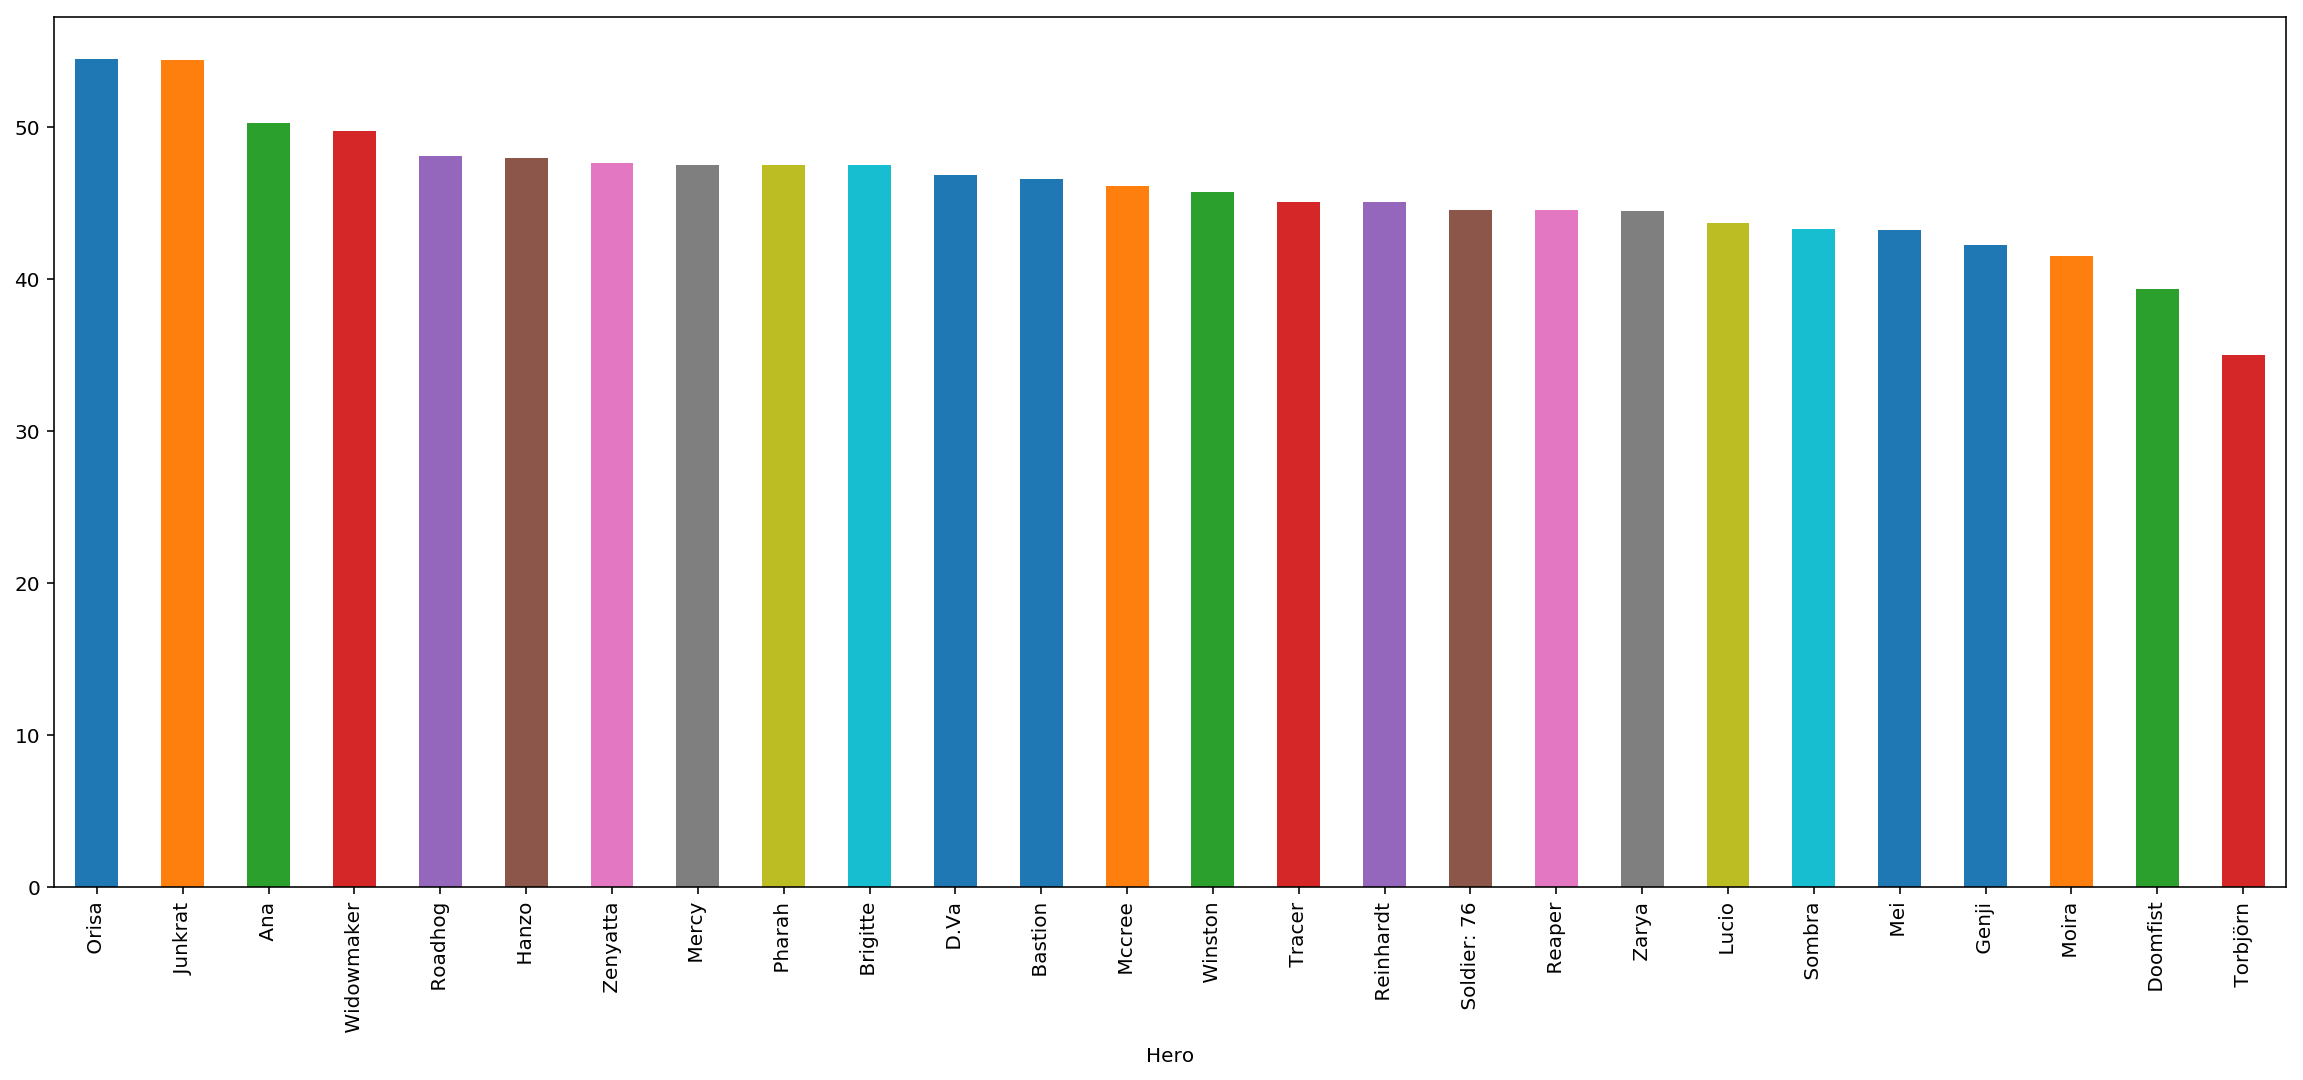

In [12]:
player_clean['win_perc'].plot(kind='bar', figsize=(20,8));

In [13]:
player_clean_tank = player_clean[player_clean['Class'] == 'T']
player_clean_tank

,Class,usage,win_perc,UU,UU_win,NU,NU_win,THU_win,FD?,FD-Win%?,...,FSUUU-Win%?,FSUNU?,FSUNU-Win%?,FLU?,FLU-Win%?,FLUUU?,FLUUU-Win%?,FLUNU?,FLUNU-Win%?,pred
Hero,,,,,,,,,,,,,,,,,,,,,
Orisa,T,5011,54.50,15.03,57.64,84.97,53.95,60.06%,0.08 (396),20.71%,...,51.46%,2414,57.42%,22.01%,30.28%,153,33.33%,950,29.79%,45.874231
Roadhog,T,3735,48.11,21.74,52.34,78.26,46.94,53.25%,0.07 (267),23.22%,...,38.35%,1645,50.88%,24.39%,25.91%,153,33.33%,758,24.41%,45.874231
D.Va,T,31306,46.83,0.00,NaN,100.00,46.83,NaN%,0.03 (1035),16.04%,...,NaN%,14088,46.77%,27.74%,28.16%,0,NaN%,8685,28.16%,45.874231
Winston,T,25237,45.74,22.68,53.35,77.32,43.50,58.30%,0.10 (2537),17.54%,...,49.02%,9626,44.13%,28.24%,28.21%,1319,31.84%,5807,27.38%,45.874231
Reinhardt,T,4005,45.07,22.12,55.53,77.88,42.10,58.31%,0.12 (478),14.85%,...,47.75%,1507,44.19%,28.99%,21.79%,173,23.70%,988,21.46%,45.874231
Zarya,T,2796,44.49,24.21,63.22,75.79,38.51,66.24%,0.07 (198),8.08%,...,53.90%,1034,41.10%,29.01%,18.87%,137,29.20%,674,16.77%,45.874231


In [14]:
player_clean_tank.mean()

usage          12015.000000
win_perc          47.456667
UU                17.630000
UU_win            56.416000
NU                82.370000
NU_win            45.305000
Unnamed: 11             NaN
FSUTHU?          234.800000
FMUTHU?          600.000000
FLUTHU?          148.000000
FMUUU?           774.500000
FMUNU?          2510.333333
FSUUU?           378.333333
FSUNU?          5052.333333
FLUUU?           322.500000
FLUNU?          2977.000000
pred              45.874231
dtype: float64

In [15]:
# Define a function that calculates the RMSE for a given split of miles.
def usage_metre_tank(usage):
    lower_usage_win = player_clean_tank[player_clean_tank.usage < usage].win_perc.mean()
    higher_usage_win = player_clean_tank[player_clean_tank.usage >= usage].win_perc.mean()
    player_clean_tank['pred'] = np.where(player_clean_tank.usage < usage, lower_usage_win, higher_usage_win)
    return np.sqrt(metrics.mean_squared_error(player_clean_tank.win_perc, player_clean_tank.pred))

In [16]:
print('RMSE:', usage_metre_tank(12000))
player_clean_tank

RMSE: 3.259701545642893


/Users/jayjay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Class,usage,win_perc,UU,UU_win,NU,NU_win,THU_win,FD?,FD-Win%?,...,FSUUU-Win%?,FSUNU?,FSUNU-Win%?,FLU?,FLU-Win%?,FLUUU?,FLUUU-Win%?,FLUNU?,FLUNU-Win%?,pred
Hero,,,,,,,,,,,,,,,,,,,,,
Orisa,T,5011,54.50,15.03,57.64,84.97,53.95,60.06%,0.08 (396),20.71%,...,51.46%,2414,57.42%,22.01%,30.28%,153,33.33%,950,29.79%,48.0425
Roadhog,T,3735,48.11,21.74,52.34,78.26,46.94,53.25%,0.07 (267),23.22%,...,38.35%,1645,50.88%,24.39%,25.91%,153,33.33%,758,24.41%,48.0425
D.Va,T,31306,46.83,0.00,NaN,100.00,46.83,NaN%,0.03 (1035),16.04%,...,NaN%,14088,46.77%,27.74%,28.16%,0,NaN%,8685,28.16%,46.2850
Winston,T,25237,45.74,22.68,53.35,77.32,43.50,58.30%,0.10 (2537),17.54%,...,49.02%,9626,44.13%,28.24%,28.21%,1319,31.84%,5807,27.38%,46.2850
Reinhardt,T,4005,45.07,22.12,55.53,77.88,42.10,58.31%,0.12 (478),14.85%,...,47.75%,1507,44.19%,28.99%,21.79%,173,23.70%,988,21.46%,48.0425
Zarya,T,2796,44.49,24.21,63.22,75.79,38.51,66.24%,0.07 (198),8.08%,...,53.90%,1034,41.10%,29.01%,18.87%,137,29.20%,674,16.77%,48.0425


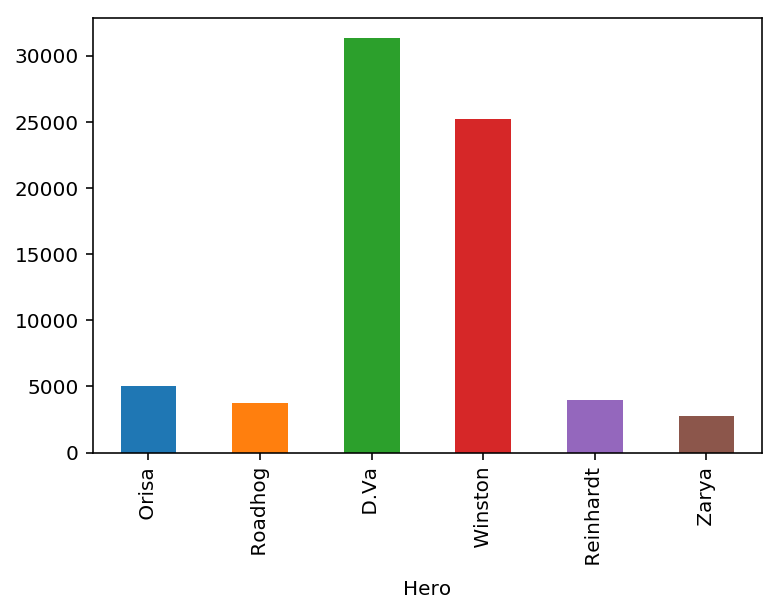

In [17]:
player_clean_tank['usage'].plot(kind='bar');

In [18]:
usage_range = list(range(player_clean.usage.min(), player_clean.usage.max(), 2000))
RMSE = [usage_metre_tank(usage) for usage in usage_range]

/Users/jayjay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [19]:
player_clean_dps = player_clean[player_clean['Class'] == 'D']
player_clean_dps

,Class,usage,win_perc,UU,UU_win,NU,NU_win,THU_win,FD?,FD-Win%?,...,FSUUU-Win%?,FSUNU?,FSUNU-Win%?,FLU?,FLU-Win%?,FLUUU?,FLUUU-Win%?,FLUNU?,FLUNU-Win%?,pred
Hero,,,,,,,,,,,,,,,,,,,,,
Junkrat,D,7022,54.44,27.81,60.73,72.19,52.02,62.21%,0.11 (776),22.94%,...,53.32%,2906,58.47%,24.39%,29.25%,359,30.92%,1354,28.80%,45.874231
Widowmaker,D,14710,49.76,23.58,58.42,76.42,47.09,62.69%,0.12 (1786),15.79%,...,48.64%,6226,50.35%,24.70%,30.10%,563,33.75%,3071,29.44%,45.874231
Hanzo,D,1867,47.99,25.23,62.21,74.77,43.19,64.48%,0.11 (210),14.29%,...,57.98%,808,44.06%,23.41%,28.60%,64,31.25%,373,28.15%,45.874231
Pharah,D,4052,47.53,24.33,56.49,75.67,44.65,58.45%,0.10 (405),17.53%,...,50.60%,1732,46.59%,24.53%,28.07%,177,33.33%,817,26.93%,45.874231
Bastion,D,423,46.57,16.55,58.57,83.45,44.19,58.57%,0.12 (51),25.49%,...,73.33%,212,43.87%,21.51%,28.57%,10,40.00%,81,27.16%,45.874231
Mccree,D,3732,46.14,24.89,55.33,75.11,43.10,56.67%,0.13 (486),16.05%,...,48.52%,1341,46.31%,29.82%,25.88%,175,29.14%,938,25.27%,45.874231
Tracer,D,20370,45.10,31.19,51.22,68.81,42.32,53.97%,0.09 (1839),14.03%,...,41.37%,7302,44.40%,28.35%,28.02%,1266,29.94%,4508,27.48%,45.874231
Soldier: 76,D,3143,44.58,25.01,54.45,74.99,41.28,55.64%,0.12 (374),18.72%,...,48.26%,1158,45.16%,30.73%,26.19%,172,33.14%,794,24.69%,45.874231
Reaper,D,404,44.55,21.53,67.82,78.47,38.17,67.82%,0.10 (40),30.00%,...,52.17%,129,42.64%,35.89%,25.52%,20,45.00%,125,22.40%,45.874231


In [20]:
# Define a function that calculates the RMSE for a given split of miles.
def usage_metre_dps(usage):
    lower_usage_win = player_clean_dps[player_clean_dps.usage < usage].win_perc.mean()
    higher_usage_win = player_clean_dps[player_clean_dps.usage >= usage].win_perc.mean()
    player_clean_dps['pred'] = np.where(player_clean_dps.usage < usage, lower_usage_win, higher_usage_win)
    return np.sqrt(metrics.mean_squared_error(player_clean_dps.win_perc, player_clean_dps.pred))

In [21]:
player_clean_dps.mean()

usage          4682.000000
win_perc         44.985714
UU               23.432143
UU_win           54.877143
NU               76.567857
NU_win           41.892143
Unnamed: 11            NaN
FSUTHU?         218.285714
FMUTHU?         604.928571
FLUTHU?         131.071429
FMUUU?          711.857143
FMUNU?          575.285714
FSUUU?          315.714286
FSUNU?         1813.571429
FLUUU?          238.142857
FLUNU?         1027.428571
pred             45.874231
dtype: float64

In [22]:
print('RMSE:', usage_metre_dps(4600))
player_clean_dps

RMSE: 4.051850899809334


/Users/jayjay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Class,usage,win_perc,UU,UU_win,NU,NU_win,THU_win,FD?,FD-Win%?,...,FSUUU-Win%?,FSUNU?,FSUNU-Win%?,FLU?,FLU-Win%?,FLUUU?,FLUUU-Win%?,FLUNU?,FLUNU-Win%?,pred
Hero,,,,,,,,,,,,,,,,,,,,,
Junkrat,D,7022,54.44,27.81,60.73,72.19,52.02,62.21%,0.11 (776),22.94%,...,53.32%,2906,58.47%,24.39%,29.25%,359,30.92%,1354,28.80%,47.885
Widowmaker,D,14710,49.76,23.58,58.42,76.42,47.09,62.69%,0.12 (1786),15.79%,...,48.64%,6226,50.35%,24.70%,30.10%,563,33.75%,3071,29.44%,47.885
Hanzo,D,1867,47.99,25.23,62.21,74.77,43.19,64.48%,0.11 (210),14.29%,...,57.98%,808,44.06%,23.41%,28.60%,64,31.25%,373,28.15%,43.826
Pharah,D,4052,47.53,24.33,56.49,75.67,44.65,58.45%,0.10 (405),17.53%,...,50.60%,1732,46.59%,24.53%,28.07%,177,33.33%,817,26.93%,43.826
Bastion,D,423,46.57,16.55,58.57,83.45,44.19,58.57%,0.12 (51),25.49%,...,73.33%,212,43.87%,21.51%,28.57%,10,40.00%,81,27.16%,43.826
Mccree,D,3732,46.14,24.89,55.33,75.11,43.10,56.67%,0.13 (486),16.05%,...,48.52%,1341,46.31%,29.82%,25.88%,175,29.14%,938,25.27%,43.826
Tracer,D,20370,45.10,31.19,51.22,68.81,42.32,53.97%,0.09 (1839),14.03%,...,41.37%,7302,44.40%,28.35%,28.02%,1266,29.94%,4508,27.48%,47.885
Soldier: 76,D,3143,44.58,25.01,54.45,74.99,41.28,55.64%,0.12 (374),18.72%,...,48.26%,1158,45.16%,30.73%,26.19%,172,33.14%,794,24.69%,43.826
Reaper,D,404,44.55,21.53,67.82,78.47,38.17,67.82%,0.10 (40),30.00%,...,52.17%,129,42.64%,35.89%,25.52%,20,45.00%,125,22.40%,43.826


In [23]:
usage_range = list(range(player_clean.usage.min(), player_clean.usage.max(), 2000))
RMSE = [usage_metre_dps(usage) for usage in usage_range]

/Users/jayjay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [24]:
player_clean_support = player_clean[player_clean['Class'] == 'S']
player_clean_support

,Class,usage,win_perc,UU,UU_win,NU,NU_win,THU_win,FD?,FD-Win%?,...,FSUUU-Win%?,FSUNU?,FSUNU-Win%?,FLU?,FLU-Win%?,FLUUU?,FLUUU-Win%?,FLUNU?,FLUNU-Win%?,pred
Hero,,,,,,,,,,,,,,,,,,,,,
Ana,S,1646,50.30,30.13,51.61,69.87,49.74,51.68%,0.08 (139),20.14%,...,41.61%,607,54.04%,24.73%,28.75%,91,32.97%,316,27.53%,45.874231
Zenyatta,S,28798,47.62,23.61,49.87,76.39,46.93,52.78%,0.10 (2776),16.35%,...,44.70%,11117,48.21%,27.60%,28.66%,1920,30.47%,6028,28.09%,45.874231
Mercy,S,27248,47.53,24.93,51.47,75.07,46.22,56.62%,0.05 (1337),13.31%,...,46.37%,10668,47.88%,26.84%,28.33%,1677,29.76%,5636,27.91%,45.874231
Brigitte,S,2765,47.52,20.14,62.66,79.86,43.70,66.51%,0.14 (380),13.42%,...,56.46%,1092,48.63%,29.55%,27.78%,117,47.86%,700,24.43%,45.874231
Lucio,S,7149,43.71,20.83,52.85,79.17,41.31,54.75%,0.07 (493),19.68%,...,48.18%,2713,41.36%,29.61%,25.22%,364,28.30%,1753,24.59%,45.874231
Moira,S,2356,41.51,33.57,48.04,66.43,38.21,47.79%,0.08 (188),10.11%,...,39.91%,808,40.47%,30.60%,19.97%,219,23.29%,502,18.53%,45.874231


In [25]:
# Define a function that calculates the RMSE for a given split of miles.
def usage_metre_support(usage):
    lower_usage_win = player_clean_support[player_clean_support.usage < usage].win_perc.mean()
    higher_usage_win = player_clean_support[player_clean_support.usage >= usage].win_perc.mean()
    player_clean_support['pred'] = np.where(player_clean_support.usage < usage, lower_usage_win, higher_usage_win)
    return np.sqrt(metrics.mean_squared_error(player_clean_support.win_perc, player_clean_support.pred))

In [26]:
player_clean_support.mean()

usage          11660.333333
win_perc          46.365000
UU                25.535000
UU_win            52.750000
NU                74.465000
NU_win            44.351667
Unnamed: 11             NaN
FSUTHU?          402.833333
FMUTHU?          888.500000
FLUTHU?          284.000000
FMUUU?          1335.666667
FMUNU?          1849.166667
FSUUU?           754.166667
FSUNU?          4500.833333
FLUUU?           731.333333
FLUNU?          2489.166667
pred              45.874231
dtype: float64

In [27]:
print('RMSE:', usage_metre_support(11600))
player_clean_support

RMSE: 2.7682199455004772


/Users/jayjay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Class,usage,win_perc,UU,UU_win,NU,NU_win,THU_win,FD?,FD-Win%?,...,FSUUU-Win%?,FSUNU?,FSUNU-Win%?,FLU?,FLU-Win%?,FLUUU?,FLUUU-Win%?,FLUNU?,FLUNU-Win%?,pred
Hero,,,,,,,,,,,,,,,,,,,,,
Ana,S,1646,50.30,30.13,51.61,69.87,49.74,51.68%,0.08 (139),20.14%,...,41.61%,607,54.04%,24.73%,28.75%,91,32.97%,316,27.53%,45.760
Zenyatta,S,28798,47.62,23.61,49.87,76.39,46.93,52.78%,0.10 (2776),16.35%,...,44.70%,11117,48.21%,27.60%,28.66%,1920,30.47%,6028,28.09%,47.575
Mercy,S,27248,47.53,24.93,51.47,75.07,46.22,56.62%,0.05 (1337),13.31%,...,46.37%,10668,47.88%,26.84%,28.33%,1677,29.76%,5636,27.91%,47.575
Brigitte,S,2765,47.52,20.14,62.66,79.86,43.70,66.51%,0.14 (380),13.42%,...,56.46%,1092,48.63%,29.55%,27.78%,117,47.86%,700,24.43%,45.760
Lucio,S,7149,43.71,20.83,52.85,79.17,41.31,54.75%,0.07 (493),19.68%,...,48.18%,2713,41.36%,29.61%,25.22%,364,28.30%,1753,24.59%,45.760
Moira,S,2356,41.51,33.57,48.04,66.43,38.21,47.79%,0.08 (188),10.11%,...,39.91%,808,40.47%,30.60%,19.97%,219,23.29%,502,18.53%,45.760


In [28]:
player_clean.groupby('Class').win_perc.mean()

Class
D    44.985714
S    46.365000
T    47.456667
Name: win_perc, dtype: float64

In [29]:
player_clean.groupby(['Class', 'Hero']).win_perc.mean().sort_values(ascending=False)#.plot(kind='bar')

Class  Hero        
T       Orisa          54.50
D       Junkrat        54.44
S       Ana            50.30
D       Widowmaker     49.76
T       Roadhog        48.11
D       Hanzo          47.99
S       Zenyatta       47.62
D       Pharah         47.53
S       Mercy          47.53
        Brigitte       47.52
T       D.Va           46.83
D       Bastion        46.57
        Mccree         46.14
T       Winston        45.74
D       Tracer         45.10
T       Reinhardt      45.07
D       Soldier: 76    44.58
        Reaper         44.55
T       Zarya          44.49
S       Lucio          43.71
D       Sombra         43.34
        Mei            43.23
        Genji          42.24
S       Moira          41.51
D       Doomfist       39.33
        Torbjörn       35.00
Name: win_perc, dtype: float64

In [30]:
player_clean.groupby('Class').mean()

,usage,win_perc,UU,UU_win,NU,NU_win,Unnamed: 11,FSUTHU?,FMUTHU?,FLUTHU?,FMUUU?,FMUNU?,FSUUU?,FSUNU?,FLUUU?,FLUNU?,pred
Class,,,,,,,,,,,,,,,,,
D,4682.000000,44.985714,23.432143,54.877143,76.567857,41.892143,NaN,218.285714,604.928571,131.071429,711.857143,575.285714,315.714286,1813.571429,238.142857,1027.428571,45.874231
S,11660.333333,46.365000,25.535000,52.750000,74.465000,44.351667,NaN,402.833333,888.500000,284.000000,1335.666667,1849.166667,754.166667,4500.833333,731.333333,2489.166667,45.874231
T,12015.000000,47.456667,17.630000,56.416000,82.370000,45.305000,NaN,234.800000,600.000000,148.000000,774.500000,2510.333333,378.333333,5052.333333,322.500000,2977.000000,45.874231


In [31]:
np.sqrt(metrics.mean_squared_error(player_clean.win_perc, player_clean.pred))

4.032001004537538

In [32]:
usage_range = list(range(player_clean.usage.min(), player_clean.usage.max(), 2000))
RMSE = [usage_metre_support(usage) for usage in usage_range]

/Users/jayjay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
player_clean.info()

In [36]:
from sklearn.model_selection import cross_val_score, train_test_split

feature_cols = ['usage', 'UU_win', 'NU_win']
X = feature_cols
y = player_clean_tank.pred

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

ValueError: Found input variables with inconsistent numbers of samples: [3, 6]

In [37]:
heroes.head()

,Player,Team,Hero,Time?,Rating?,FWin%?,Win Rate?,PTK?,PTD?,K?,...,UOOF?,UUA?,FWin%?.6,Win Rate?.4,Switches??,Switches/10??,Did Ress/10??,Was Ressed/10??,Did Ress??,Was Ress??
0,Ado,SHA,Genji,6:16:37,954,34.10%,16.30%,29.30%,18.50%,7.81,...,4.35%,10.0s,34.10%,16.30%,25,0.66,0.0,0.74,0,28
1,Ado,SHA,Tracer,6:28:49,998,34.58%,26.77%,27.80%,13.50%,7.23,...,10.29%,11.7s,34.58%,26.77%,24,0.62,0.0,0.33,0,13
2,Ado,SHA,Junkrat,1:03:31,666,36.71%,7.53%,25.40%,21.10%,5.20,...,17.39%,4.4s,36.71%,7.53%,23,3.62,0.0,1.10,0,7
3,Ado,SHA,Widowmaker,0:38:58,679,20.37%,7.27%,27.70%,19.20%,4.62,...,11.76%,4.1s,20.37%,7.27%,9,2.31,0.0,1.28,0,5
4,Ado,SHA,Pharah,0:57:41,800,24.32%,0.00%,28.10%,18.40%,5.55,...,6.67%,14.9s,24.32%,0.00%,11,1.91,0.0,1.04,0,6


In [38]:
heroes.rename(columns={'Time?':'Time_used'}, inplace=True)
heroes.rename(columns={'FWin%?':'Fights_won'}, inplace=True)
heroes.rename(columns={'Win Rate?':'Win_rate'}, inplace=True)
heroes.rename(columns={'K?':'kills'}, inplace=True)
heroes.rename(columns={'D?':'deaths'}, inplace=True)
heroes.rename(columns={'K/D?':'kill_deaths'}, inplace=True)


heroes['Win_rate'] = heroes['Win_rate'].astype(str).str.rstrip('%').astype(float)
heroes['Fights_won'] = heroes['Fights_won'].astype(str).str.rstrip('%').astype(float)
heroes['kill_deaths'] = heroes['kill_deaths'].astype(str).str.rstrip('%').astype(float)

In [42]:

heroes = heroes.drop('Rating?', axis=1)

KeyError: "labels ['Rating?'] not contained in axis"

In [43]:
heroes = heroes.drop(['Did Ress??', 'Was Ress??'], axis=1)

In [44]:
heroes.groupby(['Team', 'Player', 'Hero']).max(axis=1)

Time_used  Fights_won  Win_rate    PTK?     PTD?  \
Team Player      Hero                                                           
BOS  Aimgod      Ana           0:00:06         NaN    100.00   0.00%    0.00%   
                 Mei           0:00:07         NaN      0.00   0.00%    0.00%   
                 Moira         0:06:20       57.14     97.37  18.80%    6.70%   
                 Pharah        0:00:11         NaN    100.00   0.00%    0.00%   
                 Soldier: 76   0:00:59         NaN      6.78  33.30%   14.30%   
                 Sombra        0:12:01       53.33     39.81   9.80%   10.50%   
                 Widowmaker    0:00:14        0.00    100.00   0.00%  100.00%   
                 Zarya         0:00:03         NaN      0.00   0.00%    0.00%   
                 Zenyatta      5:48:06       46.00     37.02  12.60%   15.60%   
     DreamKazper Bastion       0:00:44      100.00     18.18   0.00%    0.00%   
                 D.Va          0:14:34       35.00      0.00  14.70%   10.20%   
                 Doomfist      0:09:08       54.55     15.33  23.30%   21.90%   
                 Genji         6:45:54       48.26     43.96  25.40%   18.60%   
                 Hanzo         0:09:04       38.46     34.01  42.40%   21.10%   
                 Junkrat       0:43:48       66.10     81.81  25.10%   18.30%   
                 Mccree        1:56:07       43.38     42.31  22.90%   19.40%   
                 Mei           0:01:11        0.00    100.00   0.00%   14.30%   
                 Orisa         0:01:05        0.00    100.00   0.00%   20.00%   
                 Pharah        3:16:49       59.75     73.62  29.30%   17.00%   
                 Reaper        0:05:15       25.00     83.81  17.60%   16.70%   
                 Roadhog       0:27:25       60.61     47.66  23.30%    9.70%   
                 Soldier: 76   1:24:42       40.66     36.44  23.00%   17.00%   
                 Sombra        0:04:44       87.50    100.00  20.00%   28.60%   
                 Symmetra      0:00:01         NaN      0.00   0.00%    0.00%   
                 Tracer        0:01:54       50.00      0.00  66.70%   10.00%   
                 Widowmaker    3:48:48       55.20     57.48  26.70%   21.40%   
     Gamsu       Brigitte      0:06:22       25.00    100.00  18.20%   21.70%   
                 D.Va          0:00:10         NaN      0.00   0.00%    0.00%   
                 Hanzo         0:00:08         NaN    100.00   0.00%    0.00%   
                 Orisa         6:16:46       54.62     61.95   9.60%   19.20%   
...                                ...         ...       ...     ...      ...   
VAL  Kariv       Winston       0:00:01         NaN    100.00   0.00%    0.00%   
                 Zarya         0:24:47       45.45     80.36  12.70%   14.30%   
                 Zenyatta     22:11:04       50.55     57.91  11.70%   15.30%   
     KuKi        Orisa         1:29:13       55.75     66.50   9.70%   23.10%   
                 Reinhardt     1:56:12       54.19     60.63  14.00%   21.70%   
                 Winston       7:18:04       47.38     59.31  14.30%   17.60%   
                 Zarya         0:00:10         NaN    100.00   0.00%    0.00%   
     SoOn        Bastion       0:33:30       53.49     66.02  23.40%   22.70%   
                 Brigitte      0:19:15       57.69     90.22   8.10%   22.80%   
                 Doomfist      0:00:38         NaN      0.00   0.00%   28.60%   
                 Hanzo         0:17:42       41.67      0.00  15.00%   21.90%   
                 Junkrat       0:51:43       47.14     77.96  26.80%   21.10%   
                 Mccree        1:17:17       41.00     41.86  27.40%   21.60%   
                 Reaper        0:20:35       52.00     95.63  19.10%   16.10%   
                 Roadhog       0:05:33       40.00    100.00  40.00%   19.00%   
                 Soldier: 76   0:06:02       40.00     64.92  10.00%   16.70%   
                 Sombra        0:29:04       62.50     53.61

In [45]:
heroes['time'] = pd.to_datetime(heroes.Time_used, errors='ignore')

In [46]:
heroes.groupby(['Hero']).mean().rank(ascending=True)

,Fights_won,Win_rate,kills,deaths,kill_deaths,+/-?,U?,KPU?,KPUK?,FF?,...,I/K - I/D?,FUUF?,UE?,UAWU?,UAWUAW?,UAWUAL?,Switches??,Switches/10??,Did Ress/10??,Was Ressed/10??
Hero,,,,,,,,,,,,,,,,,,,,,
Ana,24.0,24.0,4.0,6.0,4.0,8.0,17.0,14.0,14.0,10.0,...,23.0,11.0,2.0,7.0,6.0,20.0,9.0,21.0,13.5,11.0
Bastion,4.0,20.0,16.0,24.0,10.0,5.0,6.0,14.0,14.0,5.0,...,4.0,6.0,13.0,24.0,16.0,24.0,5.0,23.0,13.5,25.0
Brigitte,17.0,25.0,15.0,16.0,NaN,12.0,23.0,14.0,14.0,13.0,...,3.0,14.0,20.0,14.0,7.0,13.0,10.0,5.0,13.5,19.0
D.Va,13.0,4.0,17.0,7.0,NaN,24.0,2.0,14.0,14.0,27.0,...,26.0,1.5,NaN,NaN,NaN,NaN,13.0,7.0,13.5,5.0
Doomfist,2.0,1.0,18.0,27.0,NaN,2.0,5.0,14.0,14.0,4.0,...,1.0,5.0,21.0,13.0,1.0,25.0,2.0,10.0,13.5,9.0
Genji,10.0,5.0,25.0,21.0,NaN,18.0,18.0,14.0,14.0,21.0,...,24.0,22.0,23.0,10.0,9.0,18.0,22.0,17.0,13.5,21.0
Hanzo,19.0,26.0,14.0,3.0,NaN,25.0,8.0,14.0,14.0,7.0,...,22.0,8.0,24.0,25.0,20.0,22.0,14.0,26.0,13.5,18.0
Junkrat,26.0,16.0,26.0,17.0,NaN,27.0,26.0,14.0,14.0,18.0,...,20.0,21.0,15.0,19.0,23.0,10.0,23.0,6.0,13.5,26.0
Lucio,5.0,3.0,5.0,13.0,6.0,3.0,10.0,14.0,14.0,20.0,...,7.0,20.0,5.0,2.0,17.0,2.0,25.0,18.0,13.5,8.0


In [47]:

heroes.drop(heroes[heroes.Fights_won <= 1.00].index, inplace=True)
heroes.dropna(subset=['Fights_won'])
#heroes['time']= pd.datetime(heroes.time, errors='ignore')



,Player,Team,Hero,Time_used,Fights_won,Win_rate,PTK?,PTD?,kills,deaths,...,UAWUAL?,UOOF?,UUA?,FWin%?.6,Win Rate?.4,Switches??,Switches/10??,Did Ress/10??,Was Ressed/10??,time
0,Ado,SHA,Genji,6:16:37,34.10,16.30,29.30%,18.50%,7.81,7.25,...,0.02,4.35%,10.0s,34.10%,16.30%,25,0.66,0.00,0.74,6:16:37
1,Ado,SHA,Tracer,6:28:49,34.58,26.77,27.80%,13.50%,7.23,5.02,...,0.30,10.29%,11.7s,34.58%,26.77%,24,0.62,0.00,0.33,6:28:49
2,Ado,SHA,Junkrat,1:03:31,36.71,7.53,25.40%,21.10%,5.20,8.50,...,-0.64,17.39%,4.4s,36.71%,7.53%,23,3.62,0.00,1.10,1:03:31
3,Ado,SHA,Widowmaker,0:38:58,20.37,7.27,27.70%,19.20%,4.62,7.19,...,-0.27,11.76%,4.1s,20.37%,7.27%,9,2.31,0.00,1.28,0:38:58
4,Ado,SHA,Pharah,0:57:41,24.32,0.00,28.10%,18.40%,5.55,7.28,...,0.00,6.67%,14.9s,24.32%,0.00%,11,1.91,0.00,1.04,0:57:41
8,Ado,SHA,Brigitte,1:03:10,30.00,0.00,18.00%,16.60%,3.80,6.33,...,0.14,32.00%,6.9s,30.00%,0.00%,5,0.79,0.00,0.32,1:03:10
10,Agilities,VAL,Genji,9:01:53,44.16,43.75,26.50%,18.40%,8.54,6.24,...,-0.07,8.48%,10.2s,44.16%,43.75%,47,0.87,0.00,0.68,9:01:53
11,Agilities,VAL,Junkrat,5:27:09,56.64,65.24,28.20%,19.90%,9.26,5.47,...,0.62,13.55%,8.6s,56.64%,65.24%,54,1.65,0.00,1.41,5:27:09
12,Agilities,VAL,Tracer,0:13:13,21.43,55.61,16.20%,12.70%,4.54,6.81,...,0.00,0.00%,19.4s,21.43%,55.61%,6,4.54,0.00,0.00,0:13:13
13,Agilities,VAL,Roadhog,1:15:39,46.67,71.95,24.10%,13.30%,8.06,4.76,...,-0.46,7.69%,10.9s,46.67%,71.95%,13,1.72,0.00,0.13,1:15:39


In [63]:
heroes.drop(heroes[heroes.Win_rate == 0.00].index, inplace=True)
heroes.drop(heroes[heroes.kills == 0.00].index, inplace=True)

In [71]:
heroes.drop(heroes[heroes.Win_rate == 100.00].index, inplace=True)

In [72]:
hero_list = heroes.groupby(['Hero', 'Player']).mean()
hero_list.head()

Fights_won  Win_rate  kills  deaths  kill_deaths  +/-?    U?  \
Hero Player                                                                   
Ana  ANAMO          85.71     39.18   2.60    3.90         0.67 -1.30  3.90   
     ArK            52.63     90.94   0.99    4.75         0.21 -3.76  4.21   
     Bani           51.22     52.27   1.02    7.64         0.13 -6.62  4.07   
     Bdosin         64.06     90.62   2.56    5.12         0.50 -2.56  4.33   
     BigG00se       51.28     45.96   0.72    4.78         0.15 -4.06  4.35   

               KPU?  KPUK?  FF?       ...         I/K - I/D?  FUUF?    UE?  \
Hero Player                           ...                                    
Ana  ANAMO        0      0    7       ...             -0.060      1 -85.71   
     ArK          0      0  133       ...              0.691     40  -0.13   
     Bani         0      0   41       ...              0.304     13 -12.76   
     Bdosin       0      0   64       ...              0.131     16  -1.56   
     BigG00se     0      0   78       ...             -0.318     25 -11.28   

               UAWU?  UAWUAW?  UAWUAL?  Switches??  Switches/10??  \
Hero Player                                                         
Ana  ANAMO      1.00      NaN     1.00           2           2.60   
     ArK        0.65      0.9     0.47          18           1.61   
     Bani       0.38      0.8     0.17           5           1.27   
     Bdosin     0.69      1.0     0.17          14           2.76   
     BigG00se   0.36      1.8    -0.69          18           2.61   

               Did Ress/10??  Was Ressed/10??  
Hero Player                                    
Ana  ANAMO               0.0             0.00  
     ArK                 0.0             0.00  
     Bani                0.0             0.00  
     Bdosin              0.0             0.79  
     BigG00se            0.0             0.00  

[5 rows x 26 columns]

In [86]:
K = heroes.kills
D = heroes.deaths
hero_list['KD'] = K/D
hero_list.dtypes

Fights_won         float64
Win_rate           float64
kills              float64
deaths             float64
kill_deaths        float64
+/-?               float64
U?                 float64
KPU?                 int64
KPUK?                int64
FF?                  int64
AvgKillPos?        float64
AvgDeathPos?       float64
TTCU?              float64
TUH?               float64
I/K?               float64
I/D?               float64
I/K - I/D?         float64
FUUF?                int64
UE?                float64
UAWU?              float64
UAWUAW?            float64
UAWUAL?            float64
Switches??           int64
Switches/10??      float64
Did Ress/10??      float64
Was Ressed/10??    float64
KD                 float64
dtype: object

In [81]:
hero_list.groupby(['Hero','Player']).max(level = 0)

Fights_won  Win_rate  kills  deaths  kill_deaths  +/-?  \
Hero     Player                                                               
Ana      ANAMO            85.71     39.18   2.60    3.90         0.67 -1.30   
         ArK              52.63     90.94   0.99    4.75         0.21 -3.76   
         Bani             51.22     52.27   1.02    7.64         0.13 -6.62   
         Bdosin           64.06     90.62   2.56    5.12         0.50 -2.56   
         BigG00se         51.28     45.96   0.72    4.78         0.15 -4.06   
         Custa            55.71     32.76   1.43    5.17         0.28 -3.75   
         HarryHook        52.38     58.70   1.48    5.19         0.29 -3.71   
         JJoNak           50.85     59.33   2.56    4.92         0.52 -2.36   
         Kariv            32.26     14.74   2.32    4.63         0.50 -2.32   
         Kellex           52.00     15.41   1.08    5.38         0.20 -4.30   
         Mano             52.17     92.18   2.73    3.27         0.83 -0.55   
         Moth             49.49     51.02   1.24    4.98         0.25 -3.73   
         Neko             51.35     39.22   2.02    5.38         0.38 -3.36   
         Nus              62.67     68.85   1.48    3.95         0.38 -2.47   
         Rawkus           62.67     50.82   1.37    4.98         0.28 -3.61   
         Shaz             30.77     25.12   1.27    7.18         0.18 -5.91   
         Sky              13.33     12.22   1.81    9.05         0.20 -7.24   
         Sleepy           30.30     19.35   1.55    6.58         0.24 -5.03   
         Zebbosai         48.33     35.16   1.06    6.71         0.16 -5.64   
         Zuppeh           41.79     17.26   0.34    7.57         0.05 -7.23   
         dhaK             40.54     37.90   0.62    5.87         0.11 -5.25   
         neptuNo          48.72     64.59   2.16    7.79         0.28 -5.63   
         ryujehong        58.33     46.30   4.71    6.14         0.77 -1.43   
         tobi             48.68     32.66   1.10    5.92         0.19 -4.82   
         uNKOE            46.88     69.75   0.83    4.56         0.18 -3.73   
Bastion  Bdosin          100.00      5.36  11.36    3.79         3.00  7.57   
         Boombox          23.53      1.29   5.43    7.76         0.70 -2.33   
         Freefeel         20.00     32.46   4.41    5.67         0.78 -1.26   
         HarryHook        61.54     31.29  13.44    5.38         2.50  8.07   
         JJoNak           37.50     86.73   7.12    5.78         1.23  1.33   
...                         ...       ...    ...     ...          ...   ...   
Zarya    babybay          20.00      2.03   5.68    8.12         0.70 -2.44   
         coolmatt         50.00     40.85   6.60    6.13         1.08  0.47   
         envy             38.89     78.55   4.48    4.89         0.92 -0.41   
         munchkin         40.00     49.82   5.01    6.58         0.76 -1.57   
         sinatraa         47.75     53.30   5.11    5.71         0.90 -0.59   
         zunba            49.70     43.82   5.04    5.12         0.98 -0.08   
Zenyatta Aimgod           46.00     37.02   3.62    4.83         0.75 -1.21   
         Bdosin           54.04     61.59   4.44    5.16         0.86 -0.72   
         Boombox          48.06     55.71   3.39    5.37         0.63 -1.98   
         Custa            45.67     51.75   3.36    6.40         0.52 -3.05   
         Dayfly           46.55     35.90   3.91    6.01         0.65 -2.10   
         Freefeel         33.39     14.68   2.25    6.99         0.32 -4.74   
         Gido             46.44     46.60   3.03    6.01         0.50 -2.98   
         HOTBA            30.77     28.55   1.96    6.85         0.29 -4.89   
         HagoPeun         50.65     49.49   3.72    5.79         0.64 -2.07   
         HarryHook        40.12     29.73   3.84    6.52         0.59 -2.68   
         JJoNak           55.17     67.99   4.94    4.88         1.01  0.06   
         Kariv            50.55     57.91   3.73    4.40         0.85 -

In [79]:
hero_list[hero_list['kill_deaths']==hero_list['kill_deaths'].max()]

,,Fights_won,Win_rate,kills,deaths,kill_deaths,+/-?,U?,KPU?,KPUK?,FF?,...,I/K - I/D?,FUUF?,UE?,UAWU?,UAWUAW?,UAWUAL?,Switches??,Switches/10??,Did Ress/10??,Was Ressed/10??
Hero,Player,,,,,,,,,,,,,,,,,,,,,
D.Va,TviQ,50.0,95.63,6.56,0.0,inf,6.56,0.00,0,0,4,...,-0.324,0,NaN,NaN,NaN,NaN,1,3.28,0.0,0.0
Doomfist,Profit,NaN,51.72,20.69,0.0,inf,20.69,0.00,0,0,0,...,-4.046,0,NaN,NaN,NaN,NaN,1,20.69,0.0,0.0
Hanzo,neptuNo,100.0,86.67,13.33,0.0,inf,13.33,0.00,0,0,1,...,-0.415,0,NaN,NaN,NaN,NaN,3,40.00,0.0,0.0
Tracer,Boombox,NaN,85.71,7.79,0.0,inf,7.79,7.79,0,0,0,...,-0.159,1,NaN,1.0,1.0,NaN,1,7.79,0.0,0.0


In [ ]:
hero_list['hero_ave'] = hero_list.Fights_won.mean()

In [ ]:
heroes.groupby('Hero').Player.count().plot(kind='bar', figsize=(20,8));

In [ ]:
heroes.loc[heroes['Player'].Win_rate.max()]

In [ ]:
K = heroes.kills
D = heroes.deaths
hero_list['KD'] = K/D

In [ ]:
heroes.head()

In [ ]:
heroes['time'].dtypes()

In [ ]:
heroes.groupby('Team').KD.mean().rank(ascending=True)

In [ ]:
heroes.plot(kind='bar').K